In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
import seaborn as sns

# Modélisation du Dataframe

In [2]:
pd.options.display.max_columns = 150

### Chargement du DataFrame

In [3]:
df = pd.read_csv('kc_house_data_clean.csv')
print(df.shape)
df.describe()

(21596, 18)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year
count,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,5.401983e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.007548,0.234303,3.409752,7.657946,1788.631506,291.711660,1971.000787,84.468698,98077.950685,1986.650722,12758.656649,2014.322976
std,3.671416e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.086551,0.766406,0.650471,1.173218,827.763251,442.673703,29.375460,401.830330,53.514040,685.231768,27275.018316,0.467625
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,2014.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000,2014.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000,2014.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000,2015.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000,2015.000000


In [4]:
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,2015


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21596 entries, 0 to 21595
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21596 non-null  float64
 1   bedrooms       21596 non-null  int64  
 2   bathrooms      21596 non-null  float64
 3   sqft_living    21596 non-null  int64  
 4   sqft_lot       21596 non-null  int64  
 5   floors         21596 non-null  float64
 6   waterfront     21596 non-null  int64  
 7   view           21596 non-null  int64  
 8   condition      21596 non-null  int64  
 9   grade          21596 non-null  int64  
 10  sqft_above     21596 non-null  int64  
 11  sqft_basement  21596 non-null  int64  
 12  yr_built       21596 non-null  int64  
 13  yr_renovated   21596 non-null  int64  
 14  zipcode        21596 non-null  int64  
 15  sqft_living15  21596 non-null  int64  
 16  sqft_lot15     21596 non-null  int64  
 17  year           21596 non-null  int64  
dtypes: flo

In [6]:
df.corrwith(df.price)

price            1.000000
bedrooms         0.315966
bathrooms        0.525915
sqft_living      0.701921
sqft_lot         0.089885
floors           0.256831
waterfront       0.266438
view             0.397323
condition        0.036000
grade            0.667935
sqft_above       0.605395
sqft_basement    0.323772
yr_built         0.053995
yr_renovated     0.126418
zipcode         -0.053443
sqft_living15    0.585273
sqft_lot15       0.082841
year             0.003757
dtype: float64

In [7]:
data_types_zip = {'zipcode': str} 
df = df.astype(data_types_zip)  # changer le zipcode de int à object 
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode           object
sqft_living15      int64
sqft_lot15         int64
year               int64
dtype: object

### Séparation des données en deux (Entrainement et Test)

In [8]:
y = df["price"]
X = df.drop(["price"], axis=1)


In [9]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'year'],
      dtype='object')

### Creation des pipelines

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train, X_test, y_train, y_test = train_test_split(X,y)
num_col = list(X.select_dtypes(include=[float,int]).columns)
cat_col = list(X.select_dtypes(include=[object]).columns)
my_num_pipe = make_pipeline(StandardScaler(), PolynomialFeatures())
preprocessing = ColumnTransformer([
    ("one_hot", OneHotEncoder(),cat_col),
    ("scaling", my_num_pipe, num_col)
])

print(X_train.shape); print(X_test.shape)
print(y.shape)

(16197, 17)
(5399, 17)
(21596,)


In [11]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'year'],
      dtype='object')

### Modélisation

In [12]:
# Transformation
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [13]:
# Modèle de Regression Linéaire


model_lr= make_pipeline(preprocessing, LinearRegression())

model_lr.fit(X_train,y_train)
model_lr.score(X_test,y_test)*100



86.1772845848896

In [14]:
# Méthode de Regression de Ridge

model_ridge = make_pipeline(preprocessing, Ridge())


model_ridge.fit(X_train, y_train)
model_ridge.score(X_test, y_test)*100

86.126941000126

In [15]:
# Modèle Lasso

model_lasso = make_pipeline(preprocessing, Lasso())


model_lasso.fit(X_train, y_train)
model_lasso.score(X_test, y_test)*100



/home/kamel/miniconda3/envs/kbp/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.235e+14, tolerance: 2.115e+11
  model = cd_fast.enet_coordinate_descent(


86.13606829139603

In [16]:
# Modèle Elastic Net

model_elastic = make_pipeline(preprocessing, ElasticNet())


model_elastic.fit(X_train, y_train)
model_elastic.score(X_test, y_test)*100

72.89509196578074

In [17]:
y_pred = model_lr.predict(X_train)

In [18]:
residual = (y_train - y_pred).abs().sort_values()

In [19]:
to_drop = residual[residual > 700000].index

In [20]:
df_cleaned = df.drop(to_drop)

In [21]:
df_cleaned

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,2014
21592,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,2015
21593,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,2014
21594,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,2015


In [22]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'year'],
      dtype='object')

/home/kamel/miniconda3/envs/kbp/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


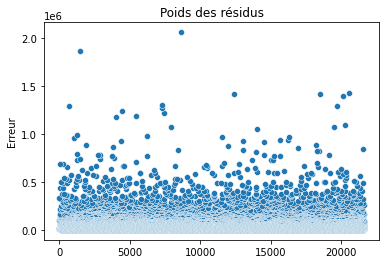

In [23]:


sns.scatterplot(residual.index, residual)
plt.title('Poids des résidus')
plt.ylabel('Erreur')
plt.show()



In [24]:
X = df_cleaned.drop('price', axis=1)
y = df_cleaned.price
X_train, X_test, y_train, y_test = train_test_split(X,y)
num_col = list(X.select_dtypes(include=[float,int]).columns)
cat_col = list(X.select_dtypes(include=[object]).columns)
my_num_pipe = make_pipeline(StandardScaler(), PolynomialFeatures())
preprocessing = ColumnTransformer([
    ("one_hot", OneHotEncoder(),cat_col),
    ("scaling", my_num_pipe, num_col)
])

In [25]:
model_lr = make_pipeline(preprocessing, LinearRegression())
model_lr.fit(X_train, y_train)
model_lr.score(X_test, y_test)*100

87.71796979905251

In [26]:
model_lr.score(X_train, y_train)

0.8867374858768503

In [27]:
import pickle
# Sauvegarder dans un fichier dans le dossier de travail
pkl_kch_filename = "pickle_model_lr.pkl"
with open("pkl_kch_filename", 'wb') as file:
    pickle.dump(model_lr, file)


In [28]:
X_train.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year
1551,4,2.50,1820,7575,1.0,0,0,3,7,1220,600,1975,0,98058,1840,7650,2014
18024,4,2.50,2100,8501,2.0,0,0,5,7,2100,0,1993,0,98022,2130,8560,2014
18555,2,1.00,720,6345,1.0,0,0,3,6,720,0,1943,0,98106,720,6345,2014
12094,2,2.00,1180,9265,1.0,0,0,3,7,1180,0,1940,0,98125,460,18000,2014
9034,5,2.50,2240,7770,1.0,0,0,3,7,1340,900,1978,0,98034,1820,7770,2014
7804,3,1.75,2020,215622,2.0,0,0,4,7,2020,0,1975,0,98070,1810,215622,2015
10825,4,2.50,2672,4297,2.0,0,0,3,8,2020,652,2005,0,98115,1720,6120,2014
17234,3,3.50,2480,10800,2.0,0,0,3,8,2480,0,1998,0,98074,2380,11310,2014
4247,3,2.50,2610,7510,2.0,0,0,3,9,2610,0,1996,0,98052,2610,8458,2014
16629,3,3.25,1740,1693,2.0,0,0,3,8,1360,380,2007,0,98116,1130,1626,2014


In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21540 entries, 0 to 21595
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21540 non-null  int64  
 1   bathrooms      21540 non-null  float64
 2   sqft_living    21540 non-null  int64  
 3   sqft_lot       21540 non-null  int64  
 4   floors         21540 non-null  float64
 5   waterfront     21540 non-null  int64  
 6   view           21540 non-null  int64  
 7   condition      21540 non-null  int64  
 8   grade          21540 non-null  int64  
 9   sqft_above     21540 non-null  int64  
 10  sqft_basement  21540 non-null  int64  
 11  yr_built       21540 non-null  int64  
 12  yr_renovated   21540 non-null  int64  
 13  zipcode        21540 non-null  object 
 14  sqft_living15  21540 non-null  int64  
 15  sqft_lot15     21540 non-null  int64  
 16  year           21540 non-null  int64  
dtypes: float64(2), int64(14), object(1)
memory usage: 

/home/kamel/miniconda3/envs/kbp/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/kamel/miniconda3/envs/kbp/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/kamel/miniconda3/envs/kbp/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/kamel/miniconda3/envs/kbp/lib/python3.10/site-packages/sklearn/pipeline.py", line 695, in score
    Xt = transform.transform(Xt)
  File "/home/kamel/miniconda3/envs/kbp/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py", line 746, in transform
    Xs = self._fit_transform(
  File "/home/kamel/miniconda3/envs/kbp/lib/python3.10/site-packages/sklearn/compos

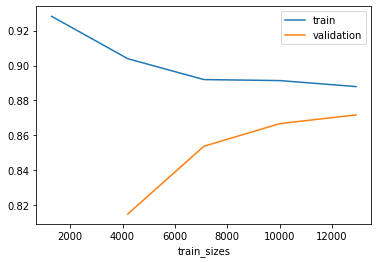

In [30]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(model_lr,X_train,y_train,return_times=True)
                                           
                                           
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

In [36]:
df.zipcode.unique()

array(['98178', '98125', '98028', '98136', '98074', '98053', '98003',
       '98198', '98146', '98038', '98007', '98115', '98107', '98126',
       '98019', '98103', '98002', '98133', '98040', '98092', '98030',
       '98119', '98112', '98052', '98027', '98117', '98058', '98001',
       '98056', '98166', '98023', '98070', '98148', '98105', '98042',
       '98008', '98059', '98122', '98144', '98004', '98005', '98034',
       '98075', '98116', '98010', '98118', '98199', '98032', '98045',
       '98102', '98077', '98108', '98168', '98177', '98065', '98029',
       '98006', '98109', '98022', '98033', '98155', '98024', '98011',
       '98031', '98106', '98072', '98188', '98014', '98055', '98039'],
      dtype=object)

In [37]:
df.condition.sort_values()

17790    1
15698    1
7369     1
13616    1
1732     1
        ..
16533    5
16543    5
16545    5
4041     5
15188    5
Name: condition, Length: 21596, dtype: int64